# proprocessing Google Form data (checkboxes, multiple choice grid items)
* Google Form: https://forms.gle/7a35kfYmzyJJb5GD9
* Google Sheets: https://docs.google.com/spreadsheets/d/1aSio5ToGq4UEKfIyYTNLt_J7ZjXV2NNm76H5pz8Y_8I/edit#gid=1108216166

---
* author:  [Prasert Kanawattanachai](prasert.k@chula.ac.th)
* YouTube: https://www.youtube.com/prasertcbs
* github: https://github.com/prasertcbs/
* [Chulalongkorn Business School](https://www.cbs.chula.ac.th/en/)
---

In [1]:
import pandas as pd
import re

In [2]:
print(f'pandas version: {pd.__version__}')
print(pd.Timestamp.now())

pandas version: 1.2.3
2021-03-09 11:29:06.105098


In [3]:
# google sheets generated by google form
# note: replace 'edit#' with 'export?format=xlsx&'
# gs_url='https://docs.google.com/spreadsheets/d/1aSio5ToGq4UEKfIyYTNLt_J7ZjXV2NNm76H5pz8Y_8I/edit?usp=sharing'
gs_url='https://docs.google.com/spreadsheets/d/1aSio5ToGq4UEKfIyYTNLt_J7ZjXV2NNm76H5pz8Y_8I/edit#gid=1108216166'
print(gs_url)
url=re.sub('edit#', 'export?format=xlsx&', gs_url)
print(url)
df = pd.read_excel(url)
df

https://docs.google.com/spreadsheets/d/1aSio5ToGq4UEKfIyYTNLt_J7ZjXV2NNm76H5pz8Y_8I/edit#gid=1108216166
https://docs.google.com/spreadsheets/d/1aSio5ToGq4UEKfIyYTNLt_J7ZjXV2NNm76H5pz8Y_8I/export?format=xlsx&gid=1108216166


,Timestamp,age (years),gender,satisfaction [product],satisfaction [price],satisfaction [service],satisfaction [overall],skills,buying preferences [alpha],buying preferences [beta],buying preferences [gamma]
0,2021-03-09 07:28:24.801,21,Male,very dissatisfied,dissatisfied,neutral,very satisfied,"Word, Excel, PowerPoint, SQL, Python, R",coffee,tea,bakery
1,2021-03-09 07:35:55.097,18,Female,dissatisfied,neutral,satisfied,very satisfied,"Word, Excel, PowerPoint, SPSS","coffee, tea, bakery, ice cream","coffee, tea, bakery",tea
2,2021-03-09 08:11:57.871,35,Prefer not to say,dissatisfied,neutral,satisfied,very satisfied,"Excel, SQL, Python, R","coffee, tea, bakery, ice cream","tea, ice cream","coffee, bakery"
3,2021-03-09 08:12:30.173,21,Prefer not to say,satisfied,neutral,dissatisfied,very dissatisfied,"Word, Excel, PowerPoint, Access",tea,"coffee, bakery","tea, bakery, ice cream"
4,2021-03-09 11:28:54.492,33,Female,satisfied,satisfied,very satisfied,very satisfied,"Excel, Python, R, SPSS",tea,bakery,"coffee, tea, bakery, ice cream"


In [4]:
df.columns

Index(['Timestamp', 'age (years)', 'gender', 'satisfaction [product]',
       'satisfaction [price]', 'satisfaction [service]',
       'satisfaction [overall]', 'skills', 'buying preferences [alpha]',
       'buying preferences [beta]', 'buying preferences [gamma]'],
      dtype='object')

In [5]:
df.columns.str.replace(r'(satisfaction|buying preferences|\[|\])', '', regex=True).str.strip()

Index(['Timestamp', 'age (years)', 'gender', 'product', 'price', 'service',
       'overall', 'skills', 'alpha', 'beta', 'gamma'],
      dtype='object')

In [6]:
df.columns=df.columns.str.replace(r'(satisfaction|buying preferences|\[|\])', '', regex=True).str.strip()
df

,Timestamp,age (years),gender,product,price,service,overall,skills,alpha,beta,gamma
0,2021-03-09 07:28:24.801,21,Male,very dissatisfied,dissatisfied,neutral,very satisfied,"Word, Excel, PowerPoint, SQL, Python, R",coffee,tea,bakery
1,2021-03-09 07:35:55.097,18,Female,dissatisfied,neutral,satisfied,very satisfied,"Word, Excel, PowerPoint, SPSS","coffee, tea, bakery, ice cream","coffee, tea, bakery",tea
2,2021-03-09 08:11:57.871,35,Prefer not to say,dissatisfied,neutral,satisfied,very satisfied,"Excel, SQL, Python, R","coffee, tea, bakery, ice cream","tea, ice cream","coffee, bakery"
3,2021-03-09 08:12:30.173,21,Prefer not to say,satisfied,neutral,dissatisfied,very dissatisfied,"Word, Excel, PowerPoint, Access",tea,"coffee, bakery","tea, bakery, ice cream"
4,2021-03-09 11:28:54.492,33,Female,satisfied,satisfied,very satisfied,very satisfied,"Excel, Python, R, SPSS",tea,bakery,"coffee, tea, bakery, ice cream"


## recode gender 

In [7]:
d = {'Female': 'F',
     'Male': 'M',
     'Prefer not to say': 'X'}

df.gender.map(d, na_action='ignore')

0    M
1    F
2    X
3    X
4    F
Name: gender, dtype: object

In [8]:
df.gender=df.gender.map(d, na_action='ignore')

In [9]:
df

,Timestamp,age (years),gender,product,price,service,overall,skills,alpha,beta,gamma
0,2021-03-09 07:28:24.801,21,M,very dissatisfied,dissatisfied,neutral,very satisfied,"Word, Excel, PowerPoint, SQL, Python, R",coffee,tea,bakery
1,2021-03-09 07:35:55.097,18,F,dissatisfied,neutral,satisfied,very satisfied,"Word, Excel, PowerPoint, SPSS","coffee, tea, bakery, ice cream","coffee, tea, bakery",tea
2,2021-03-09 08:11:57.871,35,X,dissatisfied,neutral,satisfied,very satisfied,"Excel, SQL, Python, R","coffee, tea, bakery, ice cream","tea, ice cream","coffee, bakery"
3,2021-03-09 08:12:30.173,21,X,satisfied,neutral,dissatisfied,very dissatisfied,"Word, Excel, PowerPoint, Access",tea,"coffee, bakery","tea, bakery, ice cream"
4,2021-03-09 11:28:54.492,33,F,satisfied,satisfied,very satisfied,very satisfied,"Excel, Python, R, SPSS",tea,bakery,"coffee, tea, bakery, ice cream"


## multiple choice grid (map likert scale to numerical value)

In [10]:
df['product'].map({'very dissatisfied':1, 'dissatisfied':2, 'neutral':3, 'satisfied':4, 'very satisfied':5}, na_action='ignore')

0    1
1    2
2    2
3    4
4    4
Name: product, dtype: int64

In [11]:
for c in ['product', 'price', 'service', 'overall']:
    df[f'{c}_n']=df[c].map({'very dissatisfied':1, 'dissatisfied':2, 'neutral':3, 'satisfied':4, 'very satisfied':5})

In [12]:
df

,Timestamp,age (years),gender,product,price,service,overall,skills,alpha,beta,gamma,product_n,price_n,service_n,overall_n
0,2021-03-09 07:28:24.801,21,M,very dissatisfied,dissatisfied,neutral,very satisfied,"Word, Excel, PowerPoint, SQL, Python, R",coffee,tea,bakery,1,2,3,5
1,2021-03-09 07:35:55.097,18,F,dissatisfied,neutral,satisfied,very satisfied,"Word, Excel, PowerPoint, SPSS","coffee, tea, bakery, ice cream","coffee, tea, bakery",tea,2,3,4,5
2,2021-03-09 08:11:57.871,35,X,dissatisfied,neutral,satisfied,very satisfied,"Excel, SQL, Python, R","coffee, tea, bakery, ice cream","tea, ice cream","coffee, bakery",2,3,4,5
3,2021-03-09 08:12:30.173,21,X,satisfied,neutral,dissatisfied,very dissatisfied,"Word, Excel, PowerPoint, Access",tea,"coffee, bakery","tea, bakery, ice cream",4,3,2,1
4,2021-03-09 11:28:54.492,33,F,satisfied,satisfied,very satisfied,very satisfied,"Excel, Python, R, SPSS",tea,bakery,"coffee, tea, bakery, ice cream",4,4,5,5


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Timestamp    5 non-null      datetime64[ns]
 1   age (years)  5 non-null      int64         
 2   gender       5 non-null      object        
 3   product      5 non-null      object        
 4   price        5 non-null      object        
 5   service      5 non-null      object        
 6   overall      5 non-null      object        
 7   skills       5 non-null      object        
 8   alpha        5 non-null      object        
 9   beta         5 non-null      object        
 10  gamma        5 non-null      object        
 11  product_n    5 non-null      int64         
 12  price_n      5 non-null      int64         
 13  service_n    5 non-null      int64         
 14  overall_n    5 non-null      int64         
dtypes: datetime64[ns](1), int64(5), object(9)
memory usage: 728.0

<AxesSubplot:>

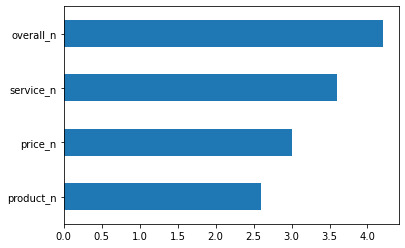

In [14]:
df.loc[:, 'product_n':'overall_n'].mean().plot(kind='barh')

<AxesSubplot:>

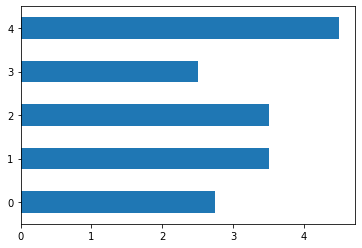

In [15]:
df.loc[:, 'product_n':'overall_n'].mean(axis=1).plot(kind='barh')

## multi-value column to dummy variables

In [16]:
dskills=df['skills'].str.get_dummies(', ')
dskills

,Access,Excel,PowerPoint,Python,R,SPSS,SQL,Word
0,0,1,1,1,1,0,1,1
1,0,1,1,0,0,1,0,1
2,0,1,0,1,1,0,1,0
3,1,1,1,0,0,0,0,1
4,0,1,0,1,1,1,0,0


In [17]:
df=pd.concat([df, dskills], axis=1).copy()
df

,Timestamp,age (years),gender,product,price,service,overall,skills,alpha,beta,...,service_n,overall_n,Access,Excel,PowerPoint,Python,R,SPSS,SQL,Word
0,2021-03-09 07:28:24.801,21,M,very dissatisfied,dissatisfied,neutral,very satisfied,"Word, Excel, PowerPoint, SQL, Python, R",coffee,tea,...,3,5,0,1,1,1,1,0,1,1
1,2021-03-09 07:35:55.097,18,F,dissatisfied,neutral,satisfied,very satisfied,"Word, Excel, PowerPoint, SPSS","coffee, tea, bakery, ice cream","coffee, tea, bakery",...,4,5,0,1,1,0,0,1,0,1
2,2021-03-09 08:11:57.871,35,X,dissatisfied,neutral,satisfied,very satisfied,"Excel, SQL, Python, R","coffee, tea, bakery, ice cream","tea, ice cream",...,4,5,0,1,0,1,1,0,1,0
3,2021-03-09 08:12:30.173,21,X,satisfied,neutral,dissatisfied,very dissatisfied,"Word, Excel, PowerPoint, Access",tea,"coffee, bakery",...,2,1,1,1,1,0,0,0,0,1
4,2021-03-09 11:28:54.492,33,F,satisfied,satisfied,very satisfied,very satisfied,"Excel, Python, R, SPSS",tea,bakery,...,5,5,0,1,0,1,1,1,0,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Timestamp    5 non-null      datetime64[ns]
 1   age (years)  5 non-null      int64         
 2   gender       5 non-null      object        
 3   product      5 non-null      object        
 4   price        5 non-null      object        
 5   service      5 non-null      object        
 6   overall      5 non-null      object        
 7   skills       5 non-null      object        
 8   alpha        5 non-null      object        
 9   beta         5 non-null      object        
 10  gamma        5 non-null      object        
 11  product_n    5 non-null      int64         
 12  price_n      5 non-null      int64         
 13  service_n    5 non-null      int64         
 14  overall_n    5 non-null      int64         
 15  Access       5 non-null      int64         
 16  Excel       

In [19]:
df.loc[:, ['Excel', 'SQL', 'Python']].sum()

Excel     5
SQL       2
Python    3
dtype: int64

In [20]:
df.loc[:, ['Excel', 'SQL', 'Python']].sum(axis=1)

0    3
1    1
2    3
3    1
4    2
dtype: int64

## preprocess grid checkbox

In [21]:
dtemps=[]
dtemps.append(df)
multival_cols=['alpha', 'beta', 'gamma']
for c in multival_cols:
    dtemp=df[c].str.get_dummies(', ')
    dtemp.columns=[f'{c}_{p}' for p in dtemp.columns]
    dtemps.append(dtemp)
data=pd.concat(dtemps, axis=1)
data

,Timestamp,age (years),gender,product,price,service,overall,skills,alpha,beta,...,alpha_ice cream,alpha_tea,beta_bakery,beta_coffee,beta_ice cream,beta_tea,gamma_bakery,gamma_coffee,gamma_ice cream,gamma_tea
0,2021-03-09 07:28:24.801,21,M,very dissatisfied,dissatisfied,neutral,very satisfied,"Word, Excel, PowerPoint, SQL, Python, R",coffee,tea,...,0,0,0,0,0,1,1,0,0,0
1,2021-03-09 07:35:55.097,18,F,dissatisfied,neutral,satisfied,very satisfied,"Word, Excel, PowerPoint, SPSS","coffee, tea, bakery, ice cream","coffee, tea, bakery",...,1,1,1,1,0,1,0,0,0,1
2,2021-03-09 08:11:57.871,35,X,dissatisfied,neutral,satisfied,very satisfied,"Excel, SQL, Python, R","coffee, tea, bakery, ice cream","tea, ice cream",...,1,1,0,0,1,1,1,1,0,0
3,2021-03-09 08:12:30.173,21,X,satisfied,neutral,dissatisfied,very dissatisfied,"Word, Excel, PowerPoint, Access",tea,"coffee, bakery",...,0,1,1,1,0,0,1,0,1,1
4,2021-03-09 11:28:54.492,33,F,satisfied,satisfied,very satisfied,very satisfied,"Excel, Python, R, SPSS",tea,bakery,...,0,1,1,0,0,0,1,1,1,1


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 35 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Timestamp        5 non-null      datetime64[ns]
 1   age (years)      5 non-null      int64         
 2   gender           5 non-null      object        
 3   product          5 non-null      object        
 4   price            5 non-null      object        
 5   service          5 non-null      object        
 6   overall          5 non-null      object        
 7   skills           5 non-null      object        
 8   alpha            5 non-null      object        
 9   beta             5 non-null      object        
 10  gamma            5 non-null      object        
 11  product_n        5 non-null      int64         
 12  price_n          5 non-null      int64         
 13  service_n        5 non-null      int64         
 14  overall_n        5 non-null      int64        

In [23]:
data.loc[:, 'alpha_bakery':'alpha_tea']

,alpha_bakery,alpha_coffee,alpha_ice cream,alpha_tea
0,0,1,0,0
1,1,1,1,1
2,1,1,1,1
3,0,0,0,1
4,0,0,0,1


In [24]:
data.columns.str.contains('alpha')

array([False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
       False, False, False, False, False, False, False, False])

In [25]:
data.columns[data.columns.str.contains('alpha')]

Index(['alpha', 'alpha_bakery', 'alpha_coffee', 'alpha_ice cream',
       'alpha_tea'],
      dtype='object')

In [26]:
data[data.columns[data.columns.str.contains('alpha')]]

,alpha,alpha_bakery,alpha_coffee,alpha_ice cream,alpha_tea
0,coffee,0,1,0,0
1,"coffee, tea, bakery, ice cream",1,1,1,1
2,"coffee, tea, bakery, ice cream",1,1,1,1
3,tea,0,0,0,1
4,tea,0,0,0,1


In [27]:
data[data.columns[data.columns.str.contains('beta')]]

,beta,beta_bakery,beta_coffee,beta_ice cream,beta_tea
0,tea,0,0,0,1
1,"coffee, tea, bakery",1,1,0,1
2,"tea, ice cream",0,0,1,1
3,"coffee, bakery",1,1,0,0
4,bakery,1,0,0,0
